In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [208]:
names_by_year = {}
for year in range(1900, 2010, 5):
    names_by_year[year] = pd.read_csv('names/yob{}.txt'.format(year), names=['Name','Gender','Count'])
    names_all = pd.concat(names_by_year, names=['Year','Pos'])

In [209]:
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()

In [210]:
gender_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Gender']).sum()

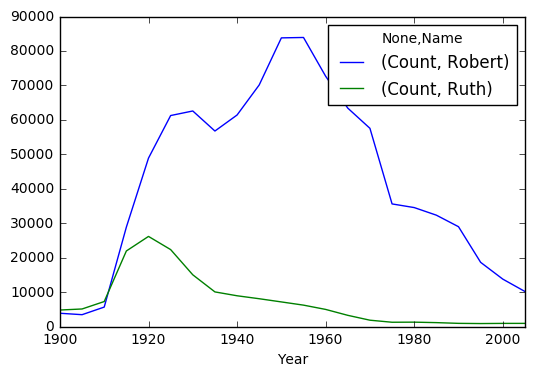

In [211]:
#Построить график изменения количества имен Ruth и Robert с 1900 по 2000.
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()

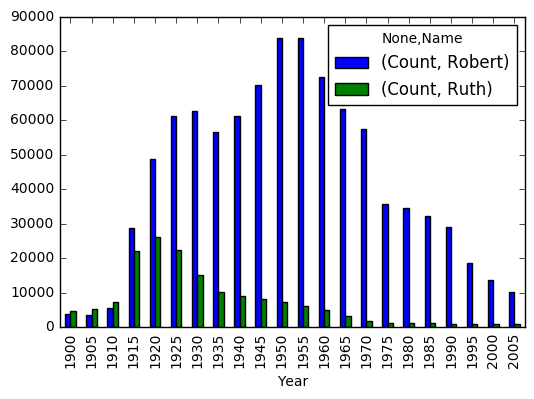

In [212]:
#Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()

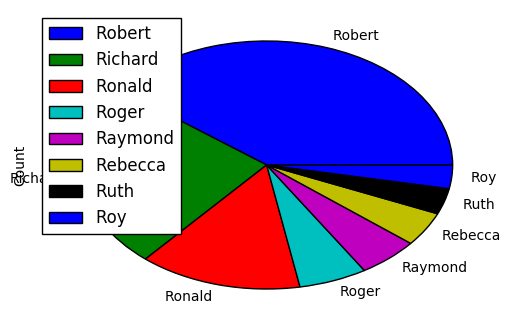

In [213]:
#Построить круговую диаграмму по количеству имен, начинающихся на R за 1950 год.
names_all[(names_all.index.get_level_values('Year')==1950) & (names_all['Name'].str.startswith("R"))].groupby('Name').sum().sort_values(by='Count', ascending=False).head(8).plot.pie(y='Count')

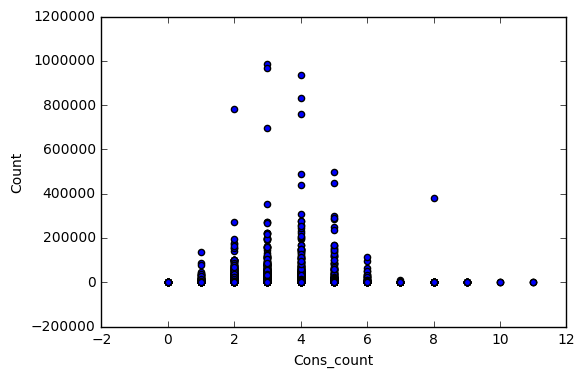

In [214]:
#Построить точечную диаграмму по количеству согласных букв в имени и частоте употребления за 100 лет.

def consonant_count(s):
    consonant_list = ['b','c','d','f','g','h','j','k','l','m','n','p','q','r','s','t','v','w','x','z']
    counter = 0
    for letter in s.lower():
        if letter in consonant_list:
            counter+=1
    return counter

def add_cons_count(row):
    row.cons = consonant_count(row.Name)
    return row


name_summed = names_all.groupby(['Name','Gender']).sum()
cons_count_series = name_summed.index.get_level_values('Name').map(consonant_count)
name_summed.assign(Cons_count=cons_count_series).plot.scatter(x='Cons_count', y='Count')